<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It lends money to people with a certain interest rate. 
When people don't pay back the loan it is recorded as " charge off" = they write off the loan because it was not paid back to them.

It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

In [1]:
# Big data set
# The label is the loan status. charge off= default on the loan vs fully paid back.

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [2]:
import pandas as pd

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
data_info.head()
# So this table is just the information of the data, not the data themselves

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
# This function prints out the information based on the column name:

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


In [8]:
# This project is a binary classification

# Steps:
# 1. EDA
# 2. missing data and preprocessing (feature engineering and feature analysis- even on feature by feature basis)
# 3. Split, train etc.395219 entries of the sample. If my computer too slow I can get a fraction of the data to work on
# 4. normalise and create model
# 5. fit + prevent overfitting
# 6. save and evaluate
# 7. check for a new costumer

# They have link to read from)

## Loading the data and other imports

In [9]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [10]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [12]:
# Let's do a countplot to explore the balance of the labels. 

In [13]:
type(df["loan_status"][0])

str

In [14]:
df['loan_status'].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

<Axes: xlabel='loan_status', ylabel='count'>

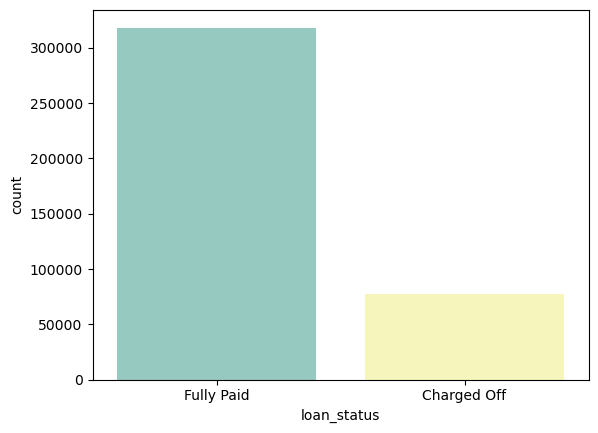

In [15]:
sns.countplot(data=df, x="loan_status", hue = "loan_status", palette = "Set3", legend=False )
# This does not look like a well balanced problem. It is common when it has to do with fraud/ spam actions vs legitimate. Usually unbalanced
# e.g. legitimate email,loans etc. etc. So accuracy can show that we do well but we need the othetr metrcs such as: precision, recall and F1 score

In [16]:
df["loan_status"].value_counts()["Fully Paid"]/(df["loan_status"].value_counts().sum())*100
# Looks like 80% of the loans where fully paid

80.38709188697825

In [17]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**TASK: Create a histogram of the loan_amnt column.**

<Figure size 1500x300 with 0 Axes>

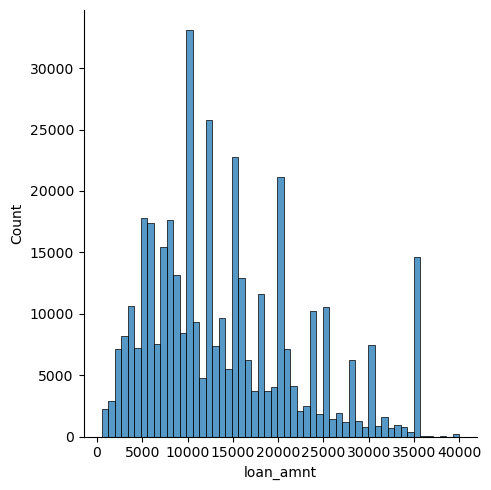

In [18]:
# CODE HERE
plt.figure(figsize=(15,3))
sns.displot(data=df, x="loan_amnt", bins = 55)
#plt.xlim= (0,45000) # x axis starts at 0 ends at 45000

# Note the spikes happen at even numbers which is usually how much people borrow (some even amount of money).
# They don't borrow random values e.g. 8333. They borrow standard loans eg 10000

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [19]:
# CODE HERE
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [20]:
#df.drop(['term','sub_grade','emp_title', 'emp_length','grade','initial_list_status','earliest_cr_line ','application_type','address'], axis=1).corr()

df.select_dtypes(include=np.number).corr()
# Since I don't use the target column this is to see if they have correlation with each other and hence if I have duplication

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<Axes: >

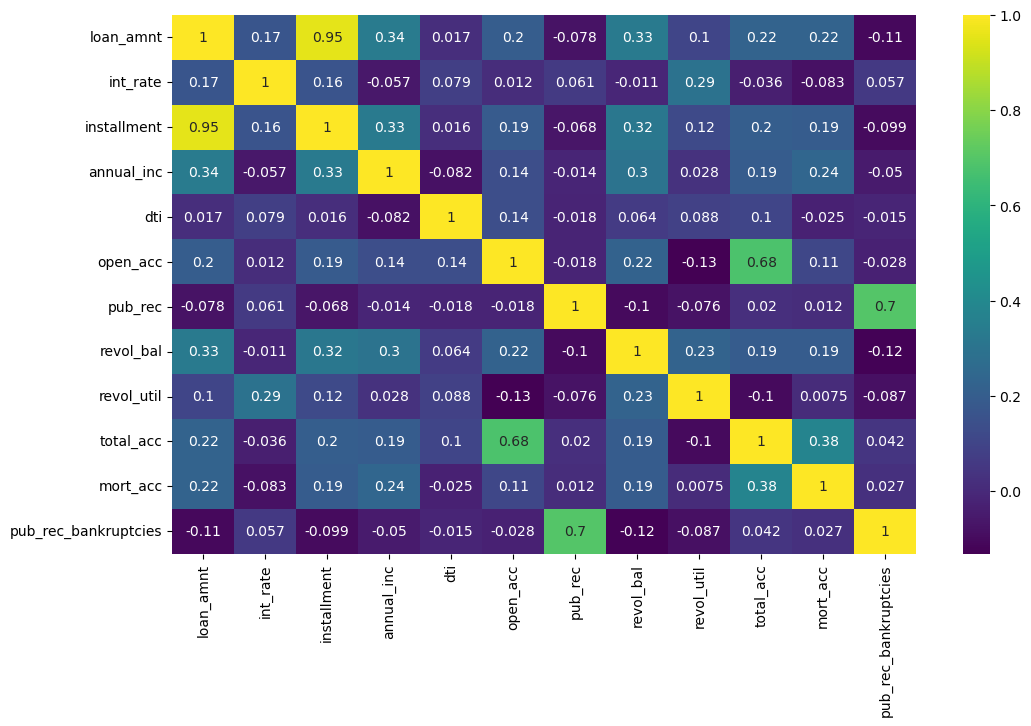

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.select_dtypes(include=np.number).corr(),annot=True,cmap="viridis")
#plt.ylim(10,0)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [22]:
# so I notice 2 features that are highly correlated. loan amount and installment. This might mean dublicated info which is not needed
# Also I would recreeate this after making dummie variable with the target column perhaps?

# We want to check that we don't leak data from our features into our labels. IF there is even one features that is 
#  very highly correlated with our label, it means that it is not a feature, it is a duplicate information similar to the label.
# But the loan amount is not the target column here... So it seems to me that these are 2 features that are highly related and act like dublicates
# without leaking data from the feature to the label.

In [23]:
# plt.figure(figsize=(12,7))
# sns.heatmap(data=df.tail().isnull(),annot=True,cmap="viridis")

In [24]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [25]:
feat_info('loan_amnt')
# It makes sense that these 2 are correlated. The more you borrow the more installment you pay 
# and this is relatively analogous so  these 2  are highly correlated

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


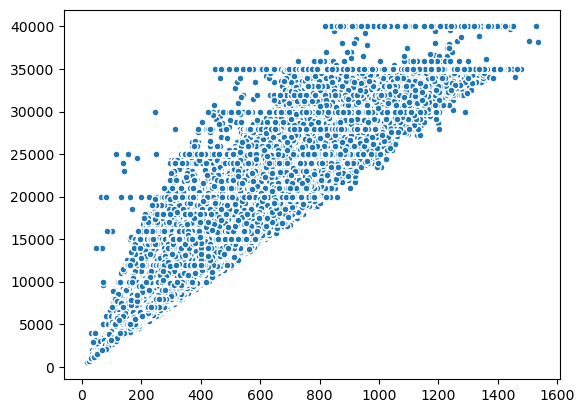

In [26]:
plt.scatter(x=df['installment'], y= df['loan_amnt'],edgecolors="white", s=25)
# This is to check if there is duplication and how linearly related the data are.
# They seem to be linearly related so it may be that one of the 2 features could be dropped to reduce the features.
# But for now I will use both.

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

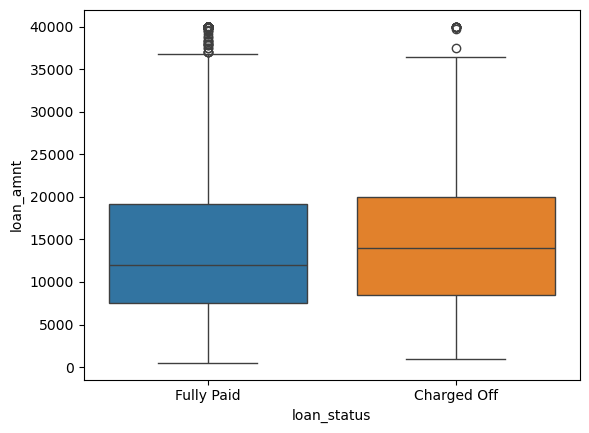

In [27]:
# Now I wonder if the loan amount might have to do with weather it will be paid back or not. So let's check it:

sns.boxplot(data=df, x= "loan_status", y= "loan_amnt", hue="loan_status")

# So we can see that the charged off ones tends to have a little bit higher loan amount but not signifficantly. They are pretty similar.

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [28]:
df.groupby("loan_status")["loan_amnt"].describe(). transpose()
# so bigger mean value and std of loan amount for the charged off ones. This is to see the actual numvers of the boxplot

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [29]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [30]:
np.sort(df["grade"].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [31]:
# type(df["grade"].unique())

In [32]:
# sorted(df["grade"].unique())
#Don't forget this built in python function (it applies to np.arrays too but returns a list

In [33]:
sorted(df["sub_grade"].unique())

# We can see that subgrade includes the grade info

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

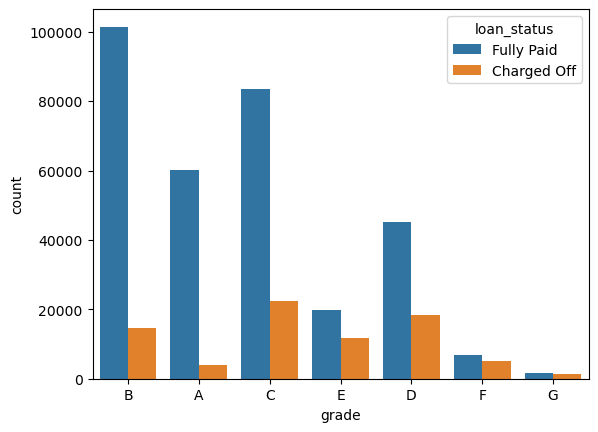

In [34]:
# How are these grades related to the target column?

sns.countplot(data=df, x= "grade", hue="loan_status")

# As an absolute number the most charhed off are from C and D. However, as a percentage the worst seem to be G and F, E.

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<Axes: xlabel='sub_grade', ylabel='count'>

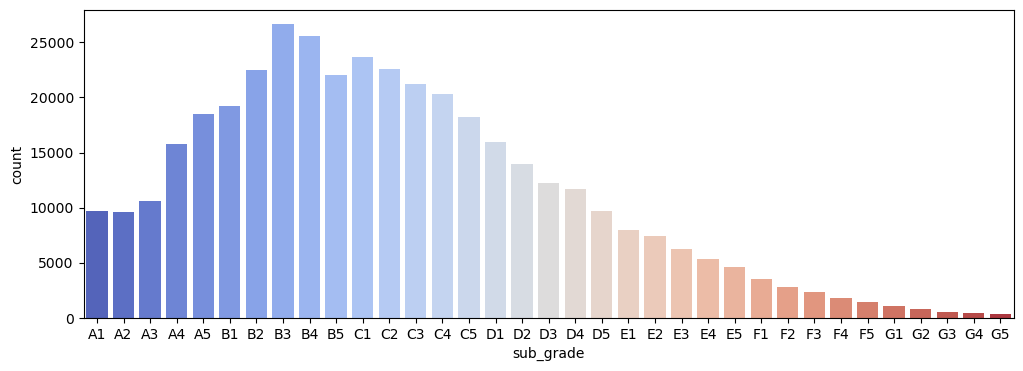

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(data=df.sort_values("sub_grade",ascending=True), x= "sub_grade", hue ="sub_grade" , palette='coolwarm')

# So most loans are of type ans subtypes B

<Axes: xlabel='sub_grade', ylabel='count'>

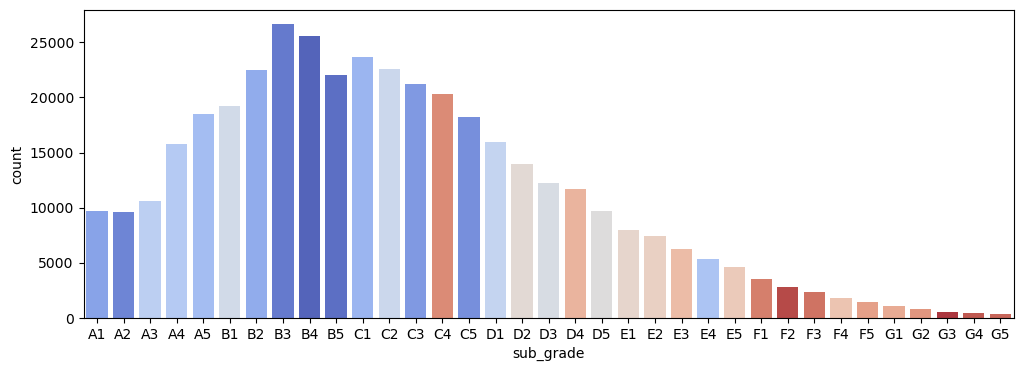

In [36]:
# Alternatively
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order, hue ='sub_grade', palette='coolwarm' )
# I think this is preferable as I only order the unique values, not the whole dataframe

In [37]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='sub_grade', ylabel='count'>

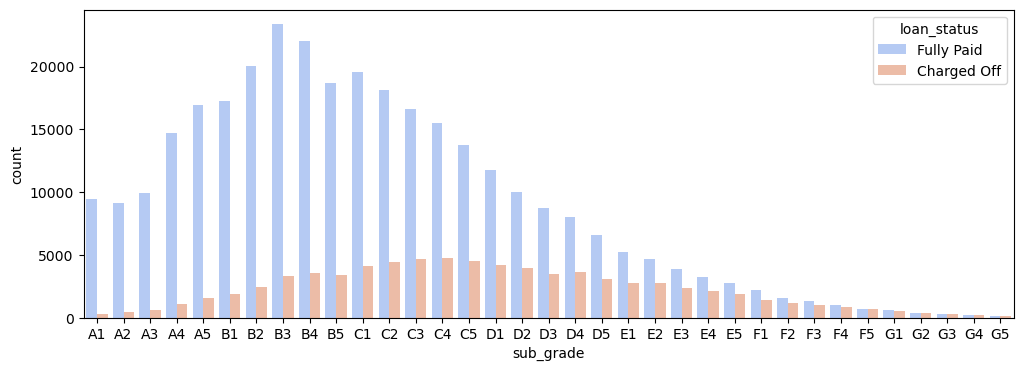

In [38]:
# Now let's see how the subgrades are with respect to the target column

plt.figure(figsize=(12,4))
sns.countplot(data=df.sort_values("sub_grade",ascending=True), x= "sub_grade", hue ="loan_status" , legend=True, palette='coolwarm')

# E,F,G subclasses seem to be the worst. A and B the best.
# Also I don't see why keep the classes in the data. Just subclasses should be enough to hold all the information.



**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

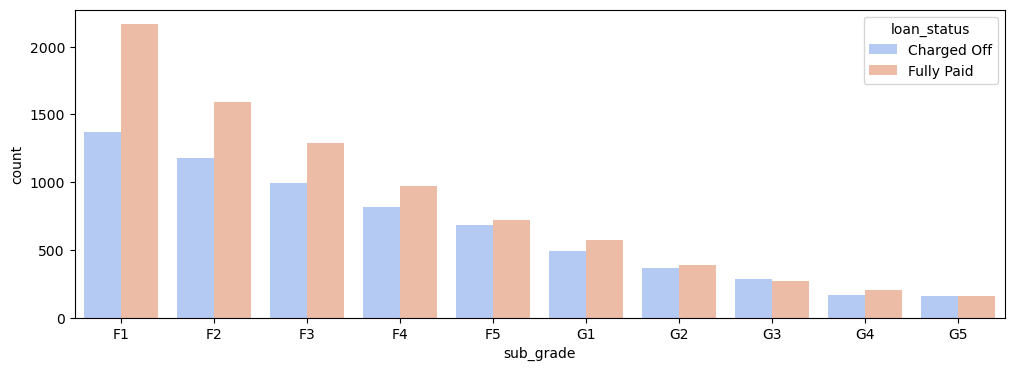

In [39]:
plt.figure(figsize=(12,4))
sub_grades = list(df.sort_values("sub_grade",ascending=True)["sub_grade"].unique()[-10:])
#print(sub_grades)
df2= df[df["sub_grade"].isin(sub_grades)]
sns.countplot(data=df2.sort_values("sub_grade",ascending=True), x= "sub_grade", hue ="loan_status" , legend=True, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

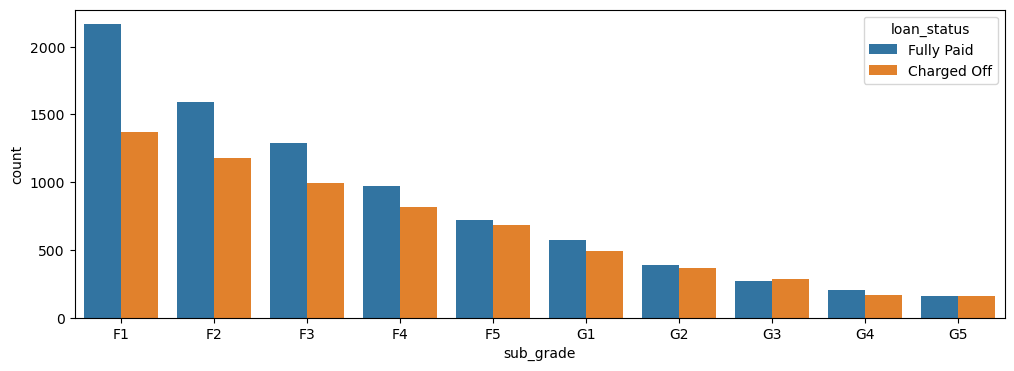

In [40]:
# Alternatively (faster):
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [42]:
loan_repaid = pd.get_dummies(df["loan_status"],drop_first= True, dtype='int64')
df["loan_repaid"] = loan_repaid

In [43]:
df[["loan_repaid","loan_status"]].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [44]:
# Alternative:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})


In [45]:
# dict1={'Fully Paid':1,'Charged Off':0}
# dict1['Charged Off']

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

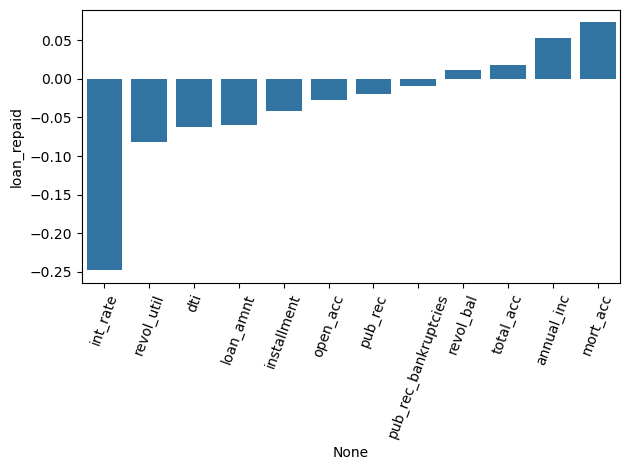

In [46]:
#df.select_dtypes(include=np.number).corr()["loan_repaid"]
#df.select_dtypes(include=np.number).columns

df2 = df.select_dtypes(include=np.number)
sns.barplot(y=df2.corr()["loan_repaid"].sort_values().drop('loan_repaid'), x=df2.corr()["loan_repaid"].sort_values().drop('loan_repaid').index)

# Rational check: you need to sort after you calculate corr. You need to drop after you get correlation for the column which you then drop

plt.xticks(rotation=70) # This is so that the axis labels don't overlap
plt.tight_layout()  # If I don't use this it prints out thing before the graph

In [47]:
df.select_dtypes(include=np.number).corr()['loan_repaid'].sort_values().drop('loan_repaid').head()

# So serie.plot(kind='bar') gets indexes as column names

int_rate      -0.247758
revol_util    -0.082373
dti           -0.062413
loan_amnt     -0.059836
installment   -0.041082
Name: loan_repaid, dtype: float64

<Axes: >

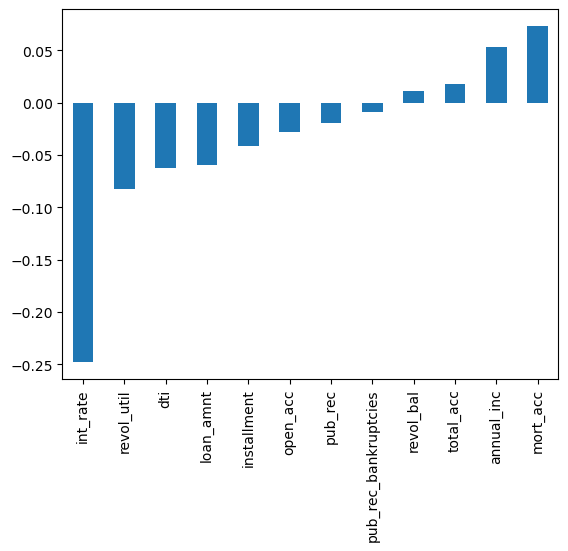

In [48]:

df.select_dtypes(include=np.number).corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [49]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [50]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [52]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

<Axes: >

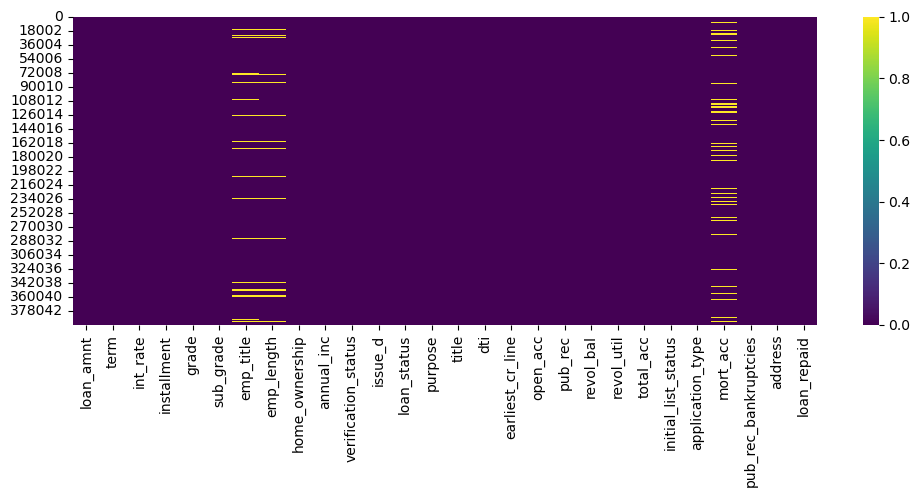

In [53]:
plt.figure(figsize=(12,4)) # That's so I can see all the columns
sns.heatmap(data=df.isnull(), cmap="viridis") # It is too many rows so with this I can only see the columns that are not good

In [54]:
df.shape

(396030, 28)

In [55]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [56]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [57]:
df["emp_title"].nunique()

173105

In [58]:
df["emp_title"].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [59]:
df["emp_title"].value_counts().head(15)

emp_title
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
manager             1145
Director            1089
General Manager     1074
Engineer             995
teacher              962
Name: count, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [60]:
# To try to fill in the data I would first need to make it numeric (dummy variables). But that is too many categories.
# And it is not that all of the borrowers are either teachers or doctors... Many of the existing categories have high values of data points.
# The percentage of missing data in the column is around 6%. It is not very low but the best option unfortunately is to drop the whole column

In [61]:
df=df.drop('emp_title', axis ="columns")

In [62]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [63]:
df.shape

(396030, 27)

#### Now let's check employer length column which has missing values

In [64]:
df["emp_length"].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [65]:
#sorted(df['emp_length'].value_counts(),reverse=True)

In [66]:
# To start with I create the countplot with sorted the values of the count

In [67]:
desc_order=df['emp_length'].value_counts().sort_values(ascending=False)
desc_order

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

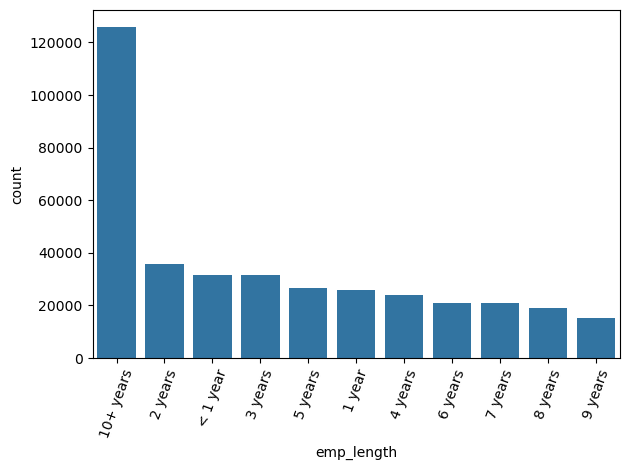

In [68]:
sns.countplot(data=df, x= 'emp_length', order=desc_order.index)
plt.xticks(rotation=70)
plt.tight_layout()

##### Now I will create the countplot sorting the x labels and also with a hue separating Fully Paid vs Charged Off

In [69]:
# Alternative solution 1:

In [70]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [71]:
# Custom function to convert strings to sortable numbers
def convert_to_number(s):
    if s == '< 1 year':
        return 0
    elif s == '10+ years':
        return 10
    else:
        return int(s.split()[0]) 

In [72]:
df2= df.copy().dropna()
df2['emp_length2']=df['emp_length'].dropna().apply(convert_to_number)
#print(df2.head(2))
axis_order=sorted(df2['emp_length2'].unique())
#print(axis_order)

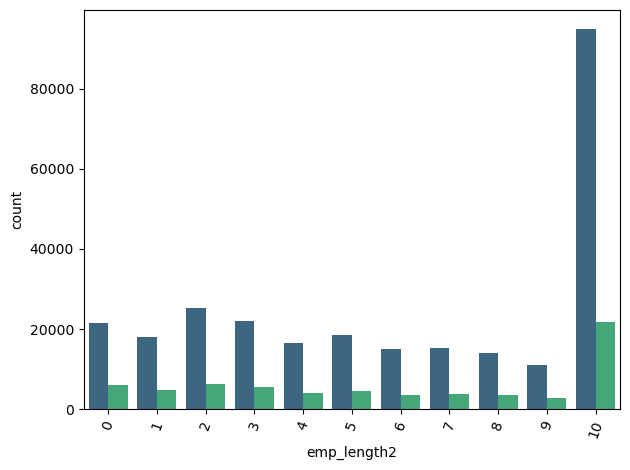

In [73]:
sns.countplot(data=df2, x= 'emp_length2', order=axis_order, hue='loan_status', palette="viridis", legend=False)
plt.xticks(rotation=70)
plt.tight_layout()

In [74]:
# Alternative solution 2:

In [75]:
sorted(df['emp_length'].dropna().unique()) # Just run this and then copy it

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [76]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

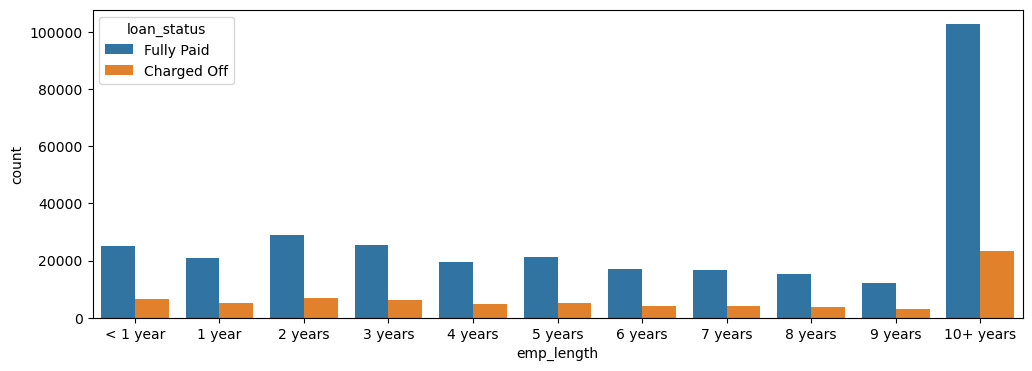

In [77]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order, hue='loan_status')

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [79]:
charg_of_per_emp_len = df[df['loan_status']== 'Charged Off'][['loan_status','emp_length']].groupby('emp_length').count()
charg_of_per_emp_len

,loan_status
emp_length,
1 year,5154
10+ years,23215
2 years,6924
3 years,6182
4 years,4608
5 years,5092
6 years,3943
7 years,4055
8 years,3829


In [80]:
type(charg_of_per_emp_len)

pandas.core.frame.DataFrame

In [81]:
total_per_emp = df[(df['loan_status'] == 'Charged Off') | (df['loan_status']== 'Fully Paid')][['loan_status','emp_length']].groupby('emp_length').count()
total_per_emp

,loan_status
emp_length,
1 year,25882
10+ years,126041
2 years,35827
3 years,31665
4 years,23952
5 years,26495
6 years,20841
7 years,20819
8 years,19168


In [82]:
type(total_per_emp)

pandas.core.frame.DataFrame

In [83]:
# THis is the percentage of charged of per category (charged off/total number of loans ignoringnan)
percentage=charg_of_per_emp_len/total_per_emp*100
percentage

,loan_status
emp_length,
1 year,19.913453
10+ years,18.418610
2 years,19.326206
3 years,19.523133
4 years,19.238477
5 years,19.218721
6 years,18.919438
7 years,19.477400
8 years,19.976002


In [84]:
# Note that the division df/df works because they both have the same columns and indexes. Otherwise I would need to create series like below

In [85]:
# Get the number of charged of per category
charg_of_per_emp_len = df[df['loan_status']== 'Charged Off'].groupby('emp_length').count()['loan_status']
charg_of_per_emp_len 

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [86]:
type(charg_of_per_emp_len)

pandas.core.series.Series

In [87]:
# There seems to be no trend in the percentages and hence the years of employment don't seem to affect much

In [88]:
# Bar plot

In [89]:
type(percentage)

pandas.core.frame.DataFrame

In [90]:
percentage.columns

Index(['loan_status'], dtype='object')

<Axes: xlabel='emp_length', ylabel='loan_status'>

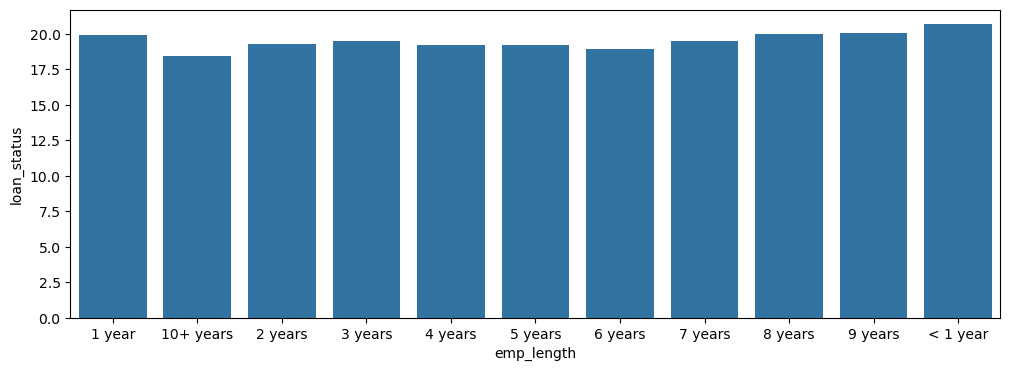

In [91]:
plt.figure(figsize=(12,4))
sns.barplot(x=percentage.index, y=percentage['loan_status'])

<Axes: xlabel='emp_length'>

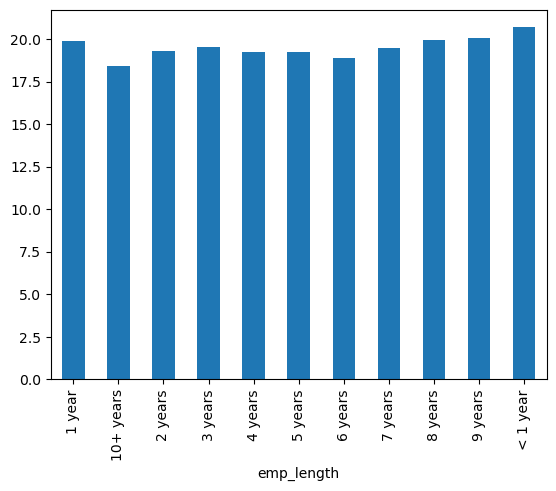

In [92]:
# ALternative
percentage.plot(kind='bar', legend=False )

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [93]:
#If the rates were not similar perhaps I could make it a column with continuous arithmentic values. For example the correlation 
# could be inversely proportional to the years of employment. Or I could make it dummy variables theoretically (maybe fewer than 11)
# But it does not seem to be highly correlated with the target column so no reason to do all this process.

df.drop('emp_length', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [94]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [95]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [96]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [97]:
df.drop('title', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [98]:
feat_info('mort_acc')

Number of mortgage accounts.


In [99]:
df['mort_acc'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

**TASK: Create a value_counts of the mort_acc column.**

In [100]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [101]:
df.select_dtypes(include=np.number).corr()['mort_acc'].sort_values().drop('mort_acc')
#0.38 is pretty good positive correlation. it is not too high so it is not duplicate information.

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

<Axes: >

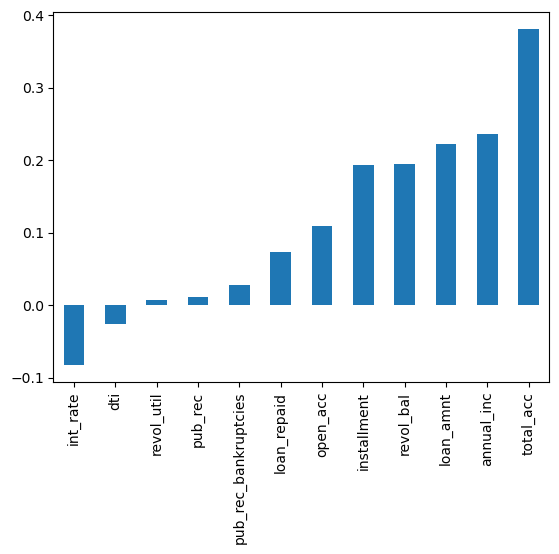

In [102]:
df.select_dtypes(include=np.number).corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')


In [103]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [104]:
# So instead of geting an overall mean value for all missing data, we will get a mean value per category of the most correlated feature.
# We could also try to fit a machine learning algorith like a linear model and apply it to predict missing values

In [105]:
mort_mean_based_on_total =df.select_dtypes(include=np.number).groupby('total_acc').mean()['mort_acc']
#df.groupby('total_acc').mean()['mort_acc']
# Note we need to get only the numeric columns to perform group by
mort_mean_based_on_total

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [106]:
mort_mean_based_on_total.loc[3.0] # test

0.05202312138728324

In [107]:
df.columns
#df.del['mort_acc_filled']

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [108]:
#df.drop('mort_acc_filled', axis=1, inplace=True)

In [109]:
#df.columns

In [110]:
def fill_missing(row):
    mort_acc = row.loc['mort_acc']
    total_acc =row.loc['total_acc']
    if pd.isna(mort_acc):   
       mort_acc = mort_mean_based_on_total.loc[total_acc]
    return mort_acc

In [111]:
df['mort_acc_filled'] = df[['mort_acc', 'total_acc']].apply(fill_missing, axis=1)

In [112]:
#checks
df['mort_acc_filled'].isna().sum()

0

In [113]:
df['mort_acc'].isna().sum()

37795

In [114]:
# df['mort_acc_filled'].tail(5)

In [115]:
# SO it seems that nan are gone however there are some 

In [116]:
# Alternatively:

In [117]:
# def fill_mort_acc(total_acc,mort_acc):
#     '''
#     Accepts the total_acc and mort_acc values for the row.
#     Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
#     for the corresponding total_acc value for that row.
    
#     total_acc_avg here should be a Series or dictionary containing the mapping of the
#     groupby averages of mort_acc per total_acc values.
#     '''
#     if np.isnan(mort_acc):
#         return mort_mean_based_on_total[total_acc]
#     else:
#         return mort_acc

In [118]:
# df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [119]:
df.drop('mort_acc', axis=1, inplace=True)

In [120]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
mort_acc_filled           0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [121]:
df = df.dropna()

In [122]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
mort_acc_filled         0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [123]:
df.select_dtypes(exclude=np.number).head(2)

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [124]:
df.select_dtypes(exclude=np.number).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [125]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [126]:
def convert_term(term):
    if term == ' 36 months':
        return 36
    elif term == ' 60 months':
        return 60
    else:
       return

In [127]:
df['term'] = df['term'].map(convert_term)

In [128]:
df['term'].unique()

array([36, 60], dtype=int64)

In [129]:
# alternative
# df['term'] = df['term'].apply(lambda term: int(term[:3]))

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [130]:
df=df.drop('grade', axis=1)

In [131]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'mort_acc_filled'],
      dtype='object')

In [132]:
df.shape

(395219, 24)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [133]:
df['sub_grade'].unique()
# They seem to be 35... so many but ok let's make dummies

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [134]:
dummies = pd.get_dummies(data=df['sub_grade'], drop_first=True, dtype='int64')
dummies.head(2)

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df=pd.concat([df, dummies], axis=1)

In [136]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'mort_acc_filled', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [137]:
df.drop('sub_grade', axis=1, inplace=True)

In [138]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'mort_acc_filled', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [139]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [140]:
# df.select_dtypes(exclude=['number']).columns # In older versions of pandas, all string data was stored as the object type by default.

In [141]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [142]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [143]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [144]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [145]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True, dtype='int64')
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [146]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'mort_acc_filled',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation'

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [147]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [148]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [149]:
# indeed the last 3 categories might be the same thing

In [150]:
df['home_ownership'].replace(to_replace=['ANY', 'NONE'], value='OTHER')

0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
396029        RENT
Name: home_ownership, Length: 395219, dtype: object

In [151]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [152]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True, dtype='int64')
dummies.head(2)

,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,1
1,1,0,0,0,0


In [153]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'mort_acc_filled',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation'

In [154]:
df.shape

(395219, 71)

In [155]:
#df.drop('home_ownership', axis=1,inplace=True) # If I do this here, then it deletes the 3 created dummy variables!!!
# Then if I concat it adds them again though but let's do in proper order
# ****************************************************************************************************************************

In [156]:
df = pd.concat([df,dummies], axis=1)
df.drop('home_ownership', axis=1,inplace=True)

In [157]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'mort_acc_filled', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding

In [158]:
df.shape

(395219, 75)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [159]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [160]:
df['address'].apply(lambda x:x[-5:]).nunique()

10

In [161]:
df['address'].apply(lambda x:x[-8:]).nunique()

540

In [162]:
df['address'].apply(lambda x:x[-8:-6]).nunique()

54

In [163]:
# So the way to make dummies is the last 5 digits as they are fewer

In [164]:
df['zip_code']=df['address'].apply(lambda x: int(x[-5:]))

In [165]:
df['zip_code'].head(2)

0    22690
1     5113
Name: zip_code, dtype: int64

In [166]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [167]:
dummies=pd.get_dummies(df['zip_code'], drop_first =True, dtype='int64')
dummies.head(2)

,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


In [168]:
df = pd.concat([df, dummies], axis=1)

In [169]:
df.shape

(395219, 85)

In [170]:
#df = df.drop(['address','zip_code'],axis=1)
df = df.drop(['zip_code','address'],axis=1)

In [171]:
df.shape

(395219, 83)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [172]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [173]:
feat_info('issue_d')

The month which the loan was funded


In [174]:
df=df.drop('issue_d', axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [175]:
df.shape

(395219, 82)

In [176]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [177]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [178]:
# I could always check if there is any kind of relationship with the target column or not.

In [179]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [180]:
df['earliest_cr_year'].head(2)

0    1990
1    2004
Name: earliest_cr_year, dtype: int64

In [181]:
df=df.drop('earliest_cr_line',axis=1)

In [182]:
df.shape

(395219, 82)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [183]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [184]:
df=df.drop('loan_status', axis=1)

In [185]:
df.shape

(395219, 81)

In [186]:
# Note the loan_status is the fully paid vs charged of column. loan_repaid is the 0 and 1 dummies I created earlier

**TASK: Set X and y variables to the .values of the features and label.**

In [187]:
X = df.drop('loan_repaid', axis=1).values

In [188]:
y = df['loan_repaid'].values

In [189]:
X.shape

(395219, 80)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [190]:
# # df = df.sample(frac=0.1,random_state=101)
# print(len(df))

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [191]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)

In [192]:
df.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,5113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  pub_rec_bankruptci

In [194]:
df.isnull().sum().sum()

0

In [195]:
# type(X_train)

In [196]:
X_train.dtype

dtype('float64')

In [197]:
# y_test.shape

In [198]:
# X_train.dtype

In [199]:
X_train

array([[9.700e+03, 3.600e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        2.006e+03],
       [2.000e+04, 3.600e+01, 1.365e+01, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.335e+04, 6.000e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       ...,
       [8.550e+03, 3.600e+01, 9.670e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+03],
       [1.200e+04, 6.000e+01, 1.624e+01, ..., 0.000e+00, 0.000e+00,
        1.999e+03],
       [3.500e+04, 3.600e+01, 1.999e+01, ..., 0.000e+00, 0.000e+00,
        1.997e+03]])

In [200]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [201]:
X_test

array([[1.480e+04, 3.600e+01, 1.849e+01, ..., 0.000e+00, 0.000e+00,
        1.992e+03],
       [3.100e+04, 6.000e+01, 1.757e+01, ..., 0.000e+00, 0.000e+00,
        1.996e+03],
       [2.200e+04, 6.000e+01, 7.890e+00, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       ...,
       [5.000e+03, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        2.008e+03],
       [2.010e+04, 6.000e+01, 2.449e+01, ..., 0.000e+00, 0.000e+00,
        1.999e+03],
       [1.440e+04, 6.000e+01, 9.670e+00, ..., 1.000e+00, 0.000e+00,
        2.002e+03]])

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaler = MinMaxScaler()

In [204]:
scaler.fit(X_train)

MinMaxScaler()

In [205]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
X_train

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [207]:
# !pip list

In [208]:
# !pip install tensorflow

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [210]:
df.shape

(395219, 81)

In [211]:
X.shape

(395219, 80)

In [225]:
# X does not include the target column, only the features. SO it has a width of 78 while the initial df has width=79

In [212]:
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(units=78, activation= 'relu'))
model.add(Dropout(0.2))
          
model.add(Dense(units = 60, activation= 'relu') ) 
model.add(Dropout(0.2))

model.add(Dense(units = 40, activation= 'relu') ) 
model.add(Dropout(0.2))

model.add(Dense(units = 20, activation= 'relu') ) 
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation= 'sigmoid'))
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss ='binary_crossentropy', optimizer='adam')

In [213]:
from tensorflow.keras.callbacks import EarlyStopping

In [214]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=25, verbose=1,)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [215]:
# type(X_train)

In [216]:
# type(y_train)

In [217]:
# y_test.shape

In [218]:
# X_test.shape 

In [219]:
model.fit( x= X_train, y=y_train, validation_data=(X_test,y_test), batch_size=256, epochs=400, verbose=1, callbacks=[early_stop])

Epoch 1/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3650 - val_loss: 0.2640
Epoch 2/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2661 - val_loss: 0.2632
Epoch 3/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2645 - val_loss: 0.2623
Epoch 4/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2611 - val_loss: 0.2624
Epoch 5/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2617 - val_loss: 0.2624
Epoch 6/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2605 - val_loss: 0.2620
Epoch 7/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 8/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2598 - val_loss: 0.2616
Epoch 9/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2594 - val_loss: 0.2615
Epoch 10/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 11/400
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2593 - val_loss: 0.2619
Epoch 12/400
1236/1

**TASK: OPTIONAL: Save your model.**

In [220]:
from tensorflow.keras.models import load_model

In [221]:
model.save('full_data_project_model_3layers_LM.keras')  

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [222]:
losses_df=pd.DataFrame(model.history.history) # If I add ['loss'] brings only the train losses
losses_df.tail()

,loss,val_loss
34,0.255054,0.261659
35,0.255064,0.262381
36,0.254819,0.262726
37,0.254702,0.261554
38,0.254635,0.262133


<Axes: >

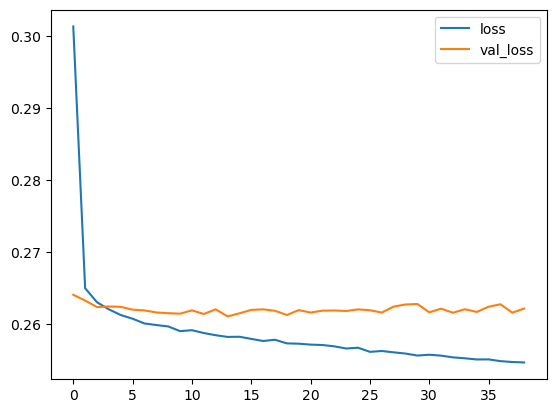

In [223]:
losses_df.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [224]:
probabilities = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [225]:
predictions=(probabilities>0.5).astype('int32')

In [227]:
from sklearn.metrics import classification_report, confusion_matrix

In [228]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [229]:
print(confusion_matrix(y_test,predictions))

[[ 6791  8867]
 [   60 63326]]


**TASK: Given the customer below, would you offer this person a loan?**

In [230]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 80, dtype: float64

In [231]:
new_customer=new_customer.values
print(new_customer)
type(new_customer)

[2.5000e+04 6.0000e+01 1.8240e+01 6.3811e+02 6.1665e+04 3.0110e+01
 1.6000e+01 0.0000e+00 2.7778e+04 6.5500e+01 4.6000e+01 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.9960e+03]


numpy.ndarray

In [232]:
#new_customer.shape

In [235]:
new_customer=scaler.transform(new_customer.reshape(1,80))
new_pred = model.predict(new_customer)
new_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.60473573]], dtype=float32)

In [236]:
new_pred_class=(new_pred>0.5).astype('int32')

In [237]:
new_pred_class

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [238]:
df.iloc[random_ind]['loan_repaid']

1.0

In [255]:
# I created and used different models with different batch sizes (128, 256, 512) and different number of hidden layer (1 to 3)
# and this seems to be the best outcome

In [ ]:
# If I check the value counts before and after I create dummies (1,0) for the target column I can see that 1 corresponds to 
# fully paid and 0 to charged of. Also 80% of the loans are fully paid. 

# This means that a model that always predicts fully paid would have 80% accurace. So the 89% is an improvement but it is not perfect

# GREAT JOB!